In [26]:
!pip install scikit-multilearn==0.2.0

In [27]:


import pandas as pd
import numpy as np
import torch
from torch.utils.data import Dataset, DataLoader
import seaborn as sns

from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.metrics import hamming_loss, accuracy_score, confusion_matrix, multilabel_confusion_matrix

from transformers import AutoTokenizer



import pandas as pd
import numpy as np


df_l1= pd.read_csv('/content/train_ta_l1.csv')
df_l1







,text,key,ta_a1,ta_a2,ta_a3,ta_a4,ta_a5,ta_a6
0,*1. முரசொலி அலுவலகம் அமைந்துள்ள இடம் பஞ்சமி...,question_1,NaN,NaN,0.0,0.0,0.0,0.0
1,சோத்துக்கு பிச்சை எடுக்கிற கடங்கார நாய்களுக...,question_1,NaN,NaN,NaN,0.0,NaN,NaN
2,தத்தபுத்த தத்தபுத்த ன்னு எதாவது புரியுதா,question_1,NaN,NaN,NaN,NaN,0.0,NaN
3,பச்சை மொளகா காரம் vicky அம்மா புண்டை நாறும் 😆,question_1,NaN,NaN,NaN,NaN,1.0,NaN
4,என்ன உடம்பு டா சாமி- சும்மா வளுவளுனு.. முலை ...,question_1,1.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
6774,😭😭😭 ஒம்மாள படிக்கல் புண்ட 😭😭😭,question_1,NaN,NaN,1.0,NaN,NaN,NaN
6775,🙄🙄🙄🙄 என்ன எழவுயா இது... இதெல்லாம் ஒரு பெருமை...,question_1,NaN,NaN,NaN,NaN,0.0,NaN
6776,🚨எக்ஸ் பிரஸ் பேர்ல் கப்பல் தீ விபத்துக்கு உள்ள...,question_1,NaN,0.0,NaN,NaN,NaN,NaN
6777,🤣 🤣 சல்லி ஜாதி வெறி முட்டா புண்ட உங்க பொண்ணுங்...,question_1,NaN,0.0,NaN,NaN,NaN,NaN


In [28]:


df_l1_test= pd.read_csv('/content/test_ta_l1.csv')
df_l1_test



,text,key,ta_a1,ta_a2,ta_a3,ta_a4,ta_a5,ta_a6
0,வைரமுத்து ஒரு காம மிருகம் என்பது சினிமா துற...,question_1,NaN,NaN,0.0,0.0,NaN,0.0
1,#4YrsOfValiantVIVEGAM #Valimai #AjithKumar ...,question_1,0.0,NaN,1.0,0.0,NaN,NaN
2,#AmbedkarBlueShirtRally இந்த போராட்டத்துக்கு ...,question_1,0.0,0.0,0.0,NaN,NaN,NaN
3,#BREAKING | திருச்சி மாவட்டம் மணப்பாறையை அடுத...,question_1,0.0,NaN,0.0,0.0,0.0,0.0
4,#Bachelor 😤😤😤😤😤படமாடா இது கோத்தா <handle repla...,question_1,1.0,0.0,NaN,0.0,NaN,NaN
...,...,...,...,...,...,...,...,...
1130,😂😂😂 ஊம்பு,question_1,1.0,1.0,NaN,0.0,NaN,NaN
1131,"😄 தமிழ் தெரிஞ்சவன்""தான் உங்கொம்மால குண்டி அடிக...",question_1,1.0,1.0,NaN,NaN,1.0,NaN
1132,😅😅😂😂 நீ தான் பங் அவனோலுக்கு கரெக்டா ஆன ஆளு.. 😎...,question_1,NaN,NaN,1.0,0.0,NaN,1.0
1133,😺✏ — ஆமாம் வேச ஆமாம் வேச அய்ம் ச்லீபின் அய்ம் ...,question_1,NaN,0.0,NaN,1.0,1.0,NaN


In [29]:
df_l3= pd.read_csv('/content/train_ta_l3.csv')
df_l3

,text,key,ta_a1,ta_a2,ta_a3,ta_a4,ta_a5,ta_a6
0,*1. முரசொலி அலுவலகம் அமைந்துள்ள இடம் பஞ்சமி...,question_3,NaN,NaN,0.0,0.0,0.0,0.0
1,சோத்துக்கு பிச்சை எடுக்கிற கடங்கார நாய்களுக...,question_3,NaN,NaN,NaN,1.0,NaN,NaN
2,தத்தபுத்த தத்தபுத்த ன்னு எதாவது புரியுதா,question_3,NaN,NaN,NaN,NaN,0.0,NaN
3,பச்சை மொளகா காரம் vicky அம்மா புண்டை நாறும் 😆,question_3,NaN,NaN,NaN,NaN,1.0,NaN
4,என்ன உடம்பு டா சாமி- சும்மா வளுவளுனு.. முலை ...,question_3,1.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
6774,😭😭😭 ஒம்மாள படிக்கல் புண்ட 😭😭😭,question_3,NaN,NaN,1.0,NaN,NaN,NaN
6775,🙄🙄🙄🙄 என்ன எழவுயா இது... இதெல்லாம் ஒரு பெருமை...,question_3,NaN,NaN,NaN,NaN,0.0,NaN
6776,🚨எக்ஸ் பிரஸ் பேர்ல் கப்பல் தீ விபத்துக்கு உள்ள...,question_3,NaN,0.0,NaN,NaN,NaN,NaN
6777,🤣 🤣 சல்லி ஜாதி வெறி முட்டா புண்ட உங்க பொண்ணுங்...,question_3,NaN,1.0,NaN,NaN,NaN,NaN


In [30]:
df_l3_test= pd.read_csv('/content/test_ta_l3.csv')
df_l3_test


,text,key,ta_a1,ta_a2,ta_a3,ta_a4,ta_a5,ta_a6
0,வைரமுத்து ஒரு காம மிருகம் என்பது சினிமா துற...,question_3,NaN,NaN,0.0,0.0,NaN,0.0
1,#4YrsOfValiantVIVEGAM #Valimai #AjithKumar ...,question_3,1.0,NaN,1.0,1.0,NaN,NaN
2,#AmbedkarBlueShirtRally இந்த போராட்டத்துக்கு ...,question_3,1.0,1.0,0.0,NaN,NaN,NaN
3,#BREAKING | திருச்சி மாவட்டம் மணப்பாறையை அடுத...,question_3,0.0,NaN,0.0,0.0,0.0,0.0
4,#Bachelor 😤😤😤😤😤படமாடா இது கோத்தா <handle repla...,question_3,1.0,1.0,NaN,1.0,NaN,NaN
...,...,...,...,...,...,...,...,...
1130,😂😂😂 ஊம்பு,question_3,1.0,1.0,NaN,1.0,NaN,NaN
1131,"😄 தமிழ் தெரிஞ்சவன்""தான் உங்கொம்மால குண்டி அடிக...",question_3,1.0,1.0,NaN,NaN,1.0,NaN
1132,😅😅😂😂 நீ தான் பங் அவனோலுக்கு கரெக்டா ஆன ஆளு.. 😎...,question_3,NaN,NaN,1.0,0.0,NaN,1.0
1133,😺✏ — ஆமாம் வேச ஆமாம் வேச அய்ம் ச்லீபின் அய்ம் ...,question_3,NaN,0.0,NaN,1.0,1.0,NaN


In [ ]:
annotation_cols = ['ta_a1', 'ta_a2', 'ta_a3', 'ta_a4', 'ta_a5','ta_a6']

def get_majority_label(row):
    valid_votes = []
    for val in row:
        try:
            fval = float(val)
            if fval in [0.0, 1.0]:
                valid_votes.append(fval)
        except (ValueError, TypeError):
            continue

    if not valid_votes:
        return None

    ones = valid_votes.count(1.0)
    zeros = valid_votes.count(0.0)

    return 1 if ones >= zeros else 0  




In [32]:
df_l1['label_1'] = df_l1[annotation_cols].apply(get_majority_label, axis=1)
df_l1


,text,key,ta_a1,ta_a2,ta_a3,ta_a4,ta_a5,ta_a6,label_1
0,*1. முரசொலி அலுவலகம் அமைந்துள்ள இடம் பஞ்சமி...,question_1,NaN,NaN,0.0,0.0,0.0,0.0,0
1,சோத்துக்கு பிச்சை எடுக்கிற கடங்கார நாய்களுக...,question_1,NaN,NaN,NaN,0.0,NaN,NaN,0
2,தத்தபுத்த தத்தபுத்த ன்னு எதாவது புரியுதா,question_1,NaN,NaN,NaN,NaN,0.0,NaN,0
3,பச்சை மொளகா காரம் vicky அம்மா புண்டை நாறும் 😆,question_1,NaN,NaN,NaN,NaN,1.0,NaN,1
4,என்ன உடம்பு டா சாமி- சும்மா வளுவளுனு.. முலை ...,question_1,1.0,NaN,NaN,NaN,NaN,NaN,1
...,...,...,...,...,...,...,...,...,...
6774,😭😭😭 ஒம்மாள படிக்கல் புண்ட 😭😭😭,question_1,NaN,NaN,1.0,NaN,NaN,NaN,1
6775,🙄🙄🙄🙄 என்ன எழவுயா இது... இதெல்லாம் ஒரு பெருமை...,question_1,NaN,NaN,NaN,NaN,0.0,NaN,0
6776,🚨எக்ஸ் பிரஸ் பேர்ல் கப்பல் தீ விபத்துக்கு உள்ள...,question_1,NaN,0.0,NaN,NaN,NaN,NaN,0
6777,🤣 🤣 சல்லி ஜாதி வெறி முட்டா புண்ட உங்க பொண்ணுங்...,question_1,NaN,0.0,NaN,NaN,NaN,NaN,0


In [33]:
df_l1_test['label_1'] = df_l1_test[annotation_cols].apply(get_majority_label, axis=1)
df_l1_test


,text,key,ta_a1,ta_a2,ta_a3,ta_a4,ta_a5,ta_a6,label_1
0,வைரமுத்து ஒரு காம மிருகம் என்பது சினிமா துற...,question_1,NaN,NaN,0.0,0.0,NaN,0.0,0
1,#4YrsOfValiantVIVEGAM #Valimai #AjithKumar ...,question_1,0.0,NaN,1.0,0.0,NaN,NaN,0
2,#AmbedkarBlueShirtRally இந்த போராட்டத்துக்கு ...,question_1,0.0,0.0,0.0,NaN,NaN,NaN,0
3,#BREAKING | திருச்சி மாவட்டம் மணப்பாறையை அடுத...,question_1,0.0,NaN,0.0,0.0,0.0,0.0,0
4,#Bachelor 😤😤😤😤😤படமாடா இது கோத்தா <handle repla...,question_1,1.0,0.0,NaN,0.0,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...
1130,😂😂😂 ஊம்பு,question_1,1.0,1.0,NaN,0.0,NaN,NaN,1
1131,"😄 தமிழ் தெரிஞ்சவன்""தான் உங்கொம்மால குண்டி அடிக...",question_1,1.0,1.0,NaN,NaN,1.0,NaN,1
1132,😅😅😂😂 நீ தான் பங் அவனோலுக்கு கரெக்டா ஆன ஆளு.. 😎...,question_1,NaN,NaN,1.0,0.0,NaN,1.0,1
1133,😺✏ — ஆமாம் வேச ஆமாம் வேச அய்ம் ச்லீபின் அய்ம் ...,question_1,NaN,0.0,NaN,1.0,1.0,NaN,1


In [ ]:
df_l3['label_3'] = df_l3[annotation_cols].apply(get_majority_label, axis=1)
df_l3


,text,key,ta_a1,ta_a2,ta_a3,ta_a4,ta_a5,ta_a6,label_3
0,*1. முரசொலி அலுவலகம் அமைந்துள்ள இடம் பஞ்சமி...,question_3,NaN,NaN,0.0,0.0,0.0,0.0,0
1,சோத்துக்கு பிச்சை எடுக்கிற கடங்கார நாய்களுக...,question_3,NaN,NaN,NaN,1.0,NaN,NaN,1
2,தத்தபுத்த தத்தபுத்த ன்னு எதாவது புரியுதா,question_3,NaN,NaN,NaN,NaN,0.0,NaN,0
3,பச்சை மொளகா காரம் vicky அம்மா புண்டை நாறும் 😆,question_3,NaN,NaN,NaN,NaN,1.0,NaN,1
4,என்ன உடம்பு டா சாமி- சும்மா வளுவளுனு.. முலை ...,question_3,1.0,NaN,NaN,NaN,NaN,NaN,1
...,...,...,...,...,...,...,...,...,...
6774,😭😭😭 ஒம்மாள படிக்கல் புண்ட 😭😭😭,question_3,NaN,NaN,1.0,NaN,NaN,NaN,1
6775,🙄🙄🙄🙄 என்ன எழவுயா இது... இதெல்லாம் ஒரு பெருமை...,question_3,NaN,NaN,NaN,NaN,0.0,NaN,0
6776,🚨எக்ஸ் பிரஸ் பேர்ல் கப்பல் தீ விபத்துக்கு உள்ள...,question_3,NaN,0.0,NaN,NaN,NaN,NaN,0
6777,🤣 🤣 சல்லி ஜாதி வெறி முட்டா புண்ட உங்க பொண்ணுங்...,question_3,NaN,1.0,NaN,NaN,NaN,NaN,1


In [35]:
df_l3_test['label_3'] = df_l3_test[annotation_cols].apply(get_majority_label, axis=1)
df_l3_test

,text,key,ta_a1,ta_a2,ta_a3,ta_a4,ta_a5,ta_a6,label_3
0,வைரமுத்து ஒரு காம மிருகம் என்பது சினிமா துற...,question_3,NaN,NaN,0.0,0.0,NaN,0.0,0
1,#4YrsOfValiantVIVEGAM #Valimai #AjithKumar ...,question_3,1.0,NaN,1.0,1.0,NaN,NaN,1
2,#AmbedkarBlueShirtRally இந்த போராட்டத்துக்கு ...,question_3,1.0,1.0,0.0,NaN,NaN,NaN,1
3,#BREAKING | திருச்சி மாவட்டம் மணப்பாறையை அடுத...,question_3,0.0,NaN,0.0,0.0,0.0,0.0,0
4,#Bachelor 😤😤😤😤😤படமாடா இது கோத்தா <handle repla...,question_3,1.0,1.0,NaN,1.0,NaN,NaN,1
...,...,...,...,...,...,...,...,...,...
1130,😂😂😂 ஊம்பு,question_3,1.0,1.0,NaN,1.0,NaN,NaN,1
1131,"😄 தமிழ் தெரிஞ்சவன்""தான் உங்கொம்மால குண்டி அடிக...",question_3,1.0,1.0,NaN,NaN,1.0,NaN,1
1132,😅😅😂😂 நீ தான் பங் அவனோலுக்கு கரெக்டா ஆன ஆளு.. 😎...,question_3,NaN,NaN,1.0,0.0,NaN,1.0,1
1133,😺✏ — ஆமாம் வேச ஆமாம் வேச அய்ம் ச்லீபின் அய்ம் ...,question_3,NaN,0.0,NaN,1.0,1.0,NaN,1


In [ ]:
df = pd.DataFrame({
    'text': df_l1['text'],
    'label_1': df_l1['label_1'],
    'label_3': df_l3['label_3']
})

df = df.dropna(subset=['label_1', 'label_3'])

df['label_1'] = df['label_1'].astype(int)
df['label_3'] = df['label_3'].astype(int)

# Preview
print(df.head())
print(df.shape)

                                                text  label_1  label_3
0     *1. முரசொலி அலுவலகம் அமைந்துள்ள இடம் பஞ்சமி...        0        0
1     சோத்துக்கு பிச்சை எடுக்கிற கடங்கார நாய்களுக...        0        1
2           தத்தபுத்த தத்தபுத்த ன்னு எதாவது புரியுதா        0        0
3      பச்சை மொளகா காரம் vicky அம்மா புண்டை நாறும் 😆        1        1
4    என்ன உடம்பு டா சாமி- சும்மா வளுவளுனு.. முலை ...        1        1
(6779, 3)


In [ ]:
df_test = pd.DataFrame({
    'text': df_l1_test['text'],
    'label_1': df_l1_test['label_1'],
    'label_3': df_l3_test['label_3']
})

df_test = df_test.dropna(subset=['label_1', 'label_3'])

df_test['label_1'] = df_test['label_1'].astype(int)
df_test['label_3'] = df_test['label_3'].astype(int)

# Preview
print(df_test.head())
print(df_test.shape)

                                                text  label_1  label_3
0     வைரமுத்து ஒரு காம மிருகம் என்பது சினிமா துற...        0        0
1  #4YrsOfValiantVIVEGAM  #Valimai #AjithKumar   ...        0        1
2  #AmbedkarBlueShirtRally  இந்த போராட்டத்துக்கு ...        0        1
3  #BREAKING | திருச்சி மாவட்டம்  மணப்பாறையை அடுத...        0        0
4  #Bachelor 😤😤😤😤😤படமாடா இது கோத்தா <handle repla...        0        1
(1135, 3)


In [38]:
df.head(85)

,text,label_1,label_3
0,*1. முரசொலி அலுவலகம் அமைந்துள்ள இடம் பஞ்சமி...,0,0
1,சோத்துக்கு பிச்சை எடுக்கிற கடங்கார நாய்களுக...,0,1
2,தத்தபுத்த தத்தபுத்த ன்னு எதாவது புரியுதா,0,0
3,பச்சை மொளகா காரம் vicky அம்மா புண்டை நாறும் 😆,1,1
4,என்ன உடம்பு டா சாமி- சும்மா வளுவளுனு.. முலை ...,1,1
...,...,...,...
80,#பொம்பள_பொருக்கி_வைரமுத்து புரோக்கர் நக்கீரன...,0,1
81,#பொம்பள_பொருக்கி_வைரமுத்து கள்ளிக்காட்டு இதிக...,0,1
82,#பொம்பள_பொருக்கி_வைரமுத்து பாகிஸ்தான் பழைய ரா...,0,0
83,#பொய்பீம் வன்னியர் சமூகத்தை பத்தி மத்த சமுதாயம...,0,0


In [ ]:
import re
def normalize_text(text):
    text = str(text).lower()
    text = re.sub(r'https?://\S+|www\.\S+', '', text)         
    text = re.sub(r'<.*?>', '', text)                          
    text = re.sub(r'\s+', ' ', text).strip()
    text = re.sub(r'[@#][\w.-]+', '[USER]', text)  

    return text

In [40]:
df['text'] = df['text'].apply(normalize_text)
df


,text,label_1,label_3
0,*1. முரசொலி அலுவலகம் அமைந்துள்ள இடம் பஞ்சமி நி...,0,0
1,சோத்துக்கு பிச்சை எடுக்கிற கடங்கார நாய்களுக்கு...,0,1
2,தத்தபுத்த தத்தபுத்த ன்னு எதாவது புரியுதா,0,0
3,பச்சை மொளகா காரம் vicky அம்மா புண்டை நாறும் 😆,1,1
4,என்ன உடம்பு டா சாமி- சும்மா வளுவளுனு.. முலை ஒவ...,1,1
...,...,...,...
6774,😭😭😭 ஒம்மாள படிக்கல் புண்ட 😭😭😭,1,1
6775,🙄🙄🙄🙄 என்ன எழவுயா இது... இதெல்லாம் ஒரு பெருமைனு...,0,0
6776,🚨எக்ஸ் பிரஸ் பேர்ல் கப்பல் தீ விபத்துக்கு உள்ள...,0,0
6777,🤣 🤣 சல்லி ஜாதி வெறி முட்டா புண்ட உங்க பொண்ணுங்...,0,1


In [41]:


df_test['text'] = df_test['text'].apply(normalize_text)
df_test




,text,label_1,label_3
0,வைரமுத்து ஒரு காம மிருகம் என்பது சினிமா துறையி...,0,0
1,"[USER] [USER] [USER] ஏண்டா குள்ள புண்டைகலா,நீங...",0,1
2,[USER] இந்த போராட்டத்துக்கு வந்த கூட்டம் [USER...,0,1
3,[USER] | திருச்சி மாவட்டம் மணப்பாறையை அடுத்த ப...,0,0
4,[USER] 😤😤😤😤😤படமாடா இது கோத்தா,0,1
...,...,...,...
1130,😂😂😂 ஊம்பு,1,1
1131,"😄 தமிழ் தெரிஞ்சவன்""தான் உங்கொம்மால குண்டி அடிக...",1,1
1132,😅😅😂😂 நீ தான் பங் அவனோலுக்கு கரெக்டா ஆன ஆளு.. 😎...,1,1
1133,😺✏ — ஆமாம் வேச ஆமாம் வேச அய்ம் ச்லீபின் அய்ம் ...,1,1


In [ ]:
from sklearn.model_selection import train_test_split

df['label_combo'] = df['label_1'].astype(str) + '_' + df['label_3'].astype(str)

train_df, val_df = train_test_split(
    df,
    test_size=0.15,
    random_state=42,
    stratify=df['label_combo']
)

train_df = train_df.drop(columns='label_combo')
val_df = val_df.drop(columns='label_combo')

print(f"Train size: {len(train_df)}")
print(f"Validation size: {len(val_df)}")


Train size: 5762
Validation size: 1017


In [43]:
train_df.head(100)

,text,label_1,label_3
917,இத்தன அயிட்டம் எதுக்கு🤔,0,0
6732,வைகோ தாயோளி கன்வர்ட் ஆனதால மந்திரி முதல்வர் பி...,1,1
2144,எந்தவொரு கடவுளுமே எனக்கு காணிக்கை செலுத்து ஆடு...,0,0
656,ங்கோத்தா பாடு.. 4 வருசமா தூங்கினவனை விட்டுட்டு...,1,1
1685,அய்யோ.,0,0
...,...,...,...
1096,கஸ்தூரி. உங்க மேல மரியாதை வச்சு இருக்கேன். நீங...,0,0
500,ராம்குமார் பேரு ஊரு முகம் எல்லாம் உங்களுக்கு த...,1,1
5010,காந்தியை கோட்சே கொன்றார் என்பது பதிவு செய்யப்ப...,0,0
668,சூத்து கிட்ட போய் மோந்து பாருடா பொட்ட😂,1,1


In [25]:
!wget https://dl.fbaipublicfiles.com/fasttext/vectors-crawl/cc.ta.300.vec.gz
!gunzip cc.ta.300.vec.gz


--2025-04-15 03:46:29--  https://dl.fbaipublicfiles.com/fasttext/vectors-crawl/cc.ta.300.vec.gz
Resolving dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)... 18.173.166.51, 18.173.166.31, 18.173.166.74, ...
Connecting to dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)|18.173.166.51|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1213735937 (1.1G) [binary/octet-stream]
Saving to: ‘cc.ta.300.vec.gz’

cc.ta.300.vec.gz    100%[===================>]   1.13G   128MB/s    in 11s     

2025-04-15 03:46:40 (101 MB/s) - ‘cc.ta.300.vec.gz’ saved [1213735937/1213735937]



In [ ]:
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
import numpy as np
import matplotlib.pyplot as plt


def load_embeddings(embedding_path,max_vocab_size):
    print("Loading Tamil FastText embeddings...")
    embeddings_index = {}

    with open(embedding_path, 'r', encoding='utf-8') as f:
        n_words, dim = map(int, f.readline().split())
        if max_vocab_size:
            n_words = min(n_words, max_vocab_size)

    embedding_matrix = np.zeros((n_words + 1, dim))  
    word_index = {}

    with open(embedding_path, 'r', encoding='utf-8') as f:
        # Skip header line
        f.readline()

        for idx, line in enumerate(f):
            if max_vocab_size and idx >= max_vocab_size:
                break

            values = line.rstrip().split(' ')
            word = values[0]
            vector = np.asarray(values[1:], dtype='float32')

            word_index[word] = idx + 1  
            embedding_matrix[idx + 1] = vector

    return word_index, embedding_matrix
# Dataset class
class TamilMultiTaskDataset(Dataset):
    def __init__(self, df, word_index, max_len=128):
        self.texts = df['text'].apply(normalize_text).tolist()
        self.label1 = df['label_1'].astype(float).tolist()
        self.label3 = df['label_3'].astype(float).tolist()
        self.word_index = word_index
        self.max_len = max_len
        self.unk_token = 0  


    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        if idx >= len(self):
            raise IndexError(f"Index {idx} out of range for dataset size {len(self)}")

        tokens = self.texts[idx].split()[:self.max_len]
        sequence = [self.word_index.get(word, self.unk_token) for word in tokens]

        if len(sequence) < self.max_len:
            sequence = sequence + [0] * (self.max_len - len(sequence))
        else:
            sequence = sequence[:self.max_len]

        return {
            'input_ids': torch.tensor(sequence, dtype=torch.long),
            'label_1': torch.tensor(self.label1[idx], dtype=torch.float),
            'label_3': torch.tensor(self.label3[idx], dtype=torch.float)
        }



import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

class TamilBiLSTMCNN(nn.Module):
    def __init__(self, embedding_matrix, lstm_units=128, cnn_filters=100):
        super().__init__()

        self.embedding = nn.Embedding.from_pretrained(
            torch.FloatTensor(embedding_matrix),
            padding_idx=0,
            freeze=False
        )

        self.bilstm = nn.LSTM(
            input_size=embedding_matrix.shape[1],
            hidden_size=lstm_units,
            bidirectional=True,
            batch_first=True,
            num_layers=1, 
            dropout=0.1


        )

        self.conv3 =  nn.Sequential(
            nn.Conv1d(2*lstm_units, cnn_filters, 3, padding=1),
            nn.BatchNorm1d(cnn_filters),
            nn.ReLU()
        )
        self.conv5 = nn.Sequential(
            nn.Conv1d(2*lstm_units, cnn_filters, 5, padding=2),
            nn.BatchNorm1d(cnn_filters),
            nn.ReLU())

        self.classifier = nn.Linear(2*cnn_filters, 2)  

    def forward(self, x):
        # x shape: [batch_size, seq_len]
        x = self.embedding(x)  

        x, _ = self.bilstm(x)  
        x = x.permute(0, 2, 1) 
        c3 = torch.relu(self.conv3(x)).max(dim=2)[0]  
        c5 = torch.relu(self.conv5(x)).max(dim=2)[0]

        features = torch.cat([c3, c5], dim=1)
        return torch.sigmoid(self.classifier(features))  

def train_model(model, train_loader,val_loader, epochs=10,lr = 0.001):
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    model = model.to(device)
    optimizer = torch.optim.Adam(model.parameters(), lr=0.001, weight_decay=0.01)  # L2 reg
    loss_fn = nn.BCELoss()

    train_losses, val_losses = [], []
    best_val_loss = float('inf')

    for epoch in range(epochs):
        
        model.train()
        epoch_train_loss = 0
        for batch in train_loader:
            inputs = batch['input_ids'].to(device)
            labels = torch.stack([batch['label_1'], batch['label_3']], dim=1).to(device)

            optimizer.zero_grad()
            outputs = model(inputs)
            loss = loss_fn(outputs, labels)
            loss.backward()
            optimizer.step()
            epoch_train_loss += loss.item()

        model.eval()
        epoch_val_loss = 0
        with torch.no_grad():
            for batch in val_loader:
                inputs = batch['input_ids'].to(device)
                labels = torch.stack([batch['label_1'], batch['label_3']], dim=1).to(device)
                outputs = model(inputs)
                epoch_val_loss += loss_fn(outputs, labels).item()

        avg_train_loss = epoch_train_loss/len(train_loader)
        avg_val_loss = epoch_val_loss/len(val_loader)
        train_losses.append(avg_train_loss)
        val_losses.append(avg_val_loss)

        if avg_val_loss < best_val_loss:
            best_val_loss = avg_val_loss
            torch.save(model.state_dict(), 'best_model.pt')

        print(f"Epoch {epoch+1}/{epochs} | Train Loss: {avg_train_loss:.4f} | Val Loss: {avg_val_loss:.4f}")

    # Plot training curves
    plt.figure(figsize=(10, 5))
    plt.plot(train_losses, label='Train Loss')
    plt.plot(val_losses, label='Val Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.show


In [ ]:
from sklearn.metrics import f1_score

def evaluate_model(model, data_loader, device='cuda'):
    model.eval()
    y_true_1 = []
    y_pred_1 = []
    y_true_3 = []
    y_pred_3 = []

    with torch.no_grad():
        for batch in data_loader:
            input_ids = batch['input_ids'].to(device)

            label_1 = batch['label_1'].to(device)
            label_3 = batch['label_3'].to(device)

            outputs = model(input_ids)
            pred_1 = (outputs[:, 0] > 0.5).int().cpu().numpy()  
            pred_3 = (outputs[:, 1] > 0.5).int().cpu().numpy()  

            y_true_1.extend(label_1.cpu().numpy())
            y_pred_1.extend(pred_1)
            y_true_3.extend(label_3.cpu().numpy())
            y_pred_3.extend(pred_3)

    f1_1 = f1_score(y_true_1, y_pred_1, average='macro')
    f1_3 = f1_score(y_true_3, y_pred_3, average='macro')

    print(f"Macro F1-score for Label 1 (gendered abuse): {f1_1:.4f}")
    print(f"Macro F1-score for Label 3 (explicit content): {f1_3:.4f}")
    return f1_1, f1_3



Loading Tamil FastText embeddings...


/usr/local/lib/python3.11/dist-packages/torch/nn/modules/rnn.py:123: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.1 and num_layers=1
  warnings.warn(


Epoch 1/8 | Train Loss: 0.6338 | Val Loss: 0.8696
Epoch 2/8 | Train Loss: 0.5830 | Val Loss: 0.5617
Epoch 3/8 | Train Loss: 0.5404 | Val Loss: 0.5550
Epoch 4/8 | Train Loss: 0.5092 | Val Loss: 0.5958
Epoch 5/8 | Train Loss: 0.4867 | Val Loss: 0.5495
Epoch 6/8 | Train Loss: 0.4656 | Val Loss: 0.5717
Epoch 7/8 | Train Loss: 0.4500 | Val Loss: 0.5611
Epoch 8/8 | Train Loss: 0.4365 | Val Loss: 0.5954

Validation Results:
Macro F1-score for Label 1 (gendered abuse): 0.6378
Macro F1-score for Label 3 (explicit content): 0.6777

Test Results:
Macro F1-score for Label 1 (gendered abuse): 0.6518
Macro F1-score for Label 3 (explicit content): 0.7336


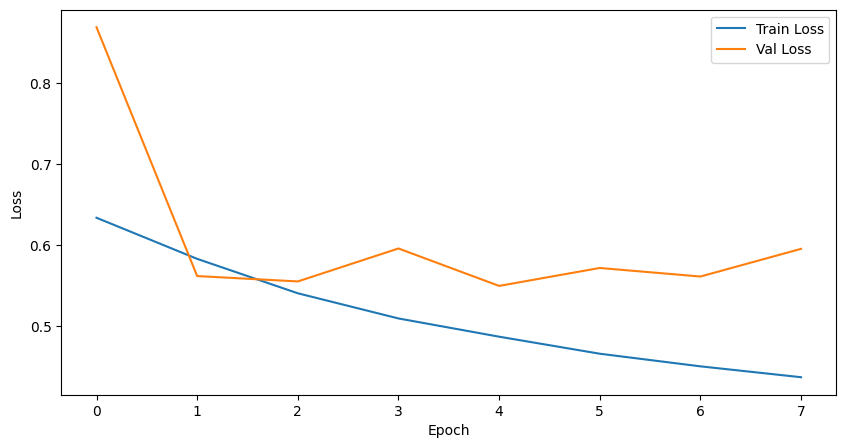

In [ ]:
if __name__ == "__main__":
    word_index, embedding_matrix = load_embeddings('/content/cc.ta.300.vec',max_vocab_size=10000)
    model = TamilBiLSTMCNN(embedding_matrix)

    train_dataset = TamilMultiTaskDataset(train_df, word_index)
    val_dataset = TamilMultiTaskDataset(val_df, word_index)
    test_dataset = TamilMultiTaskDataset(df_test, word_index)


    train_loader = DataLoader(train_dataset, batch_size=8, shuffle=True)
    val_loader = DataLoader(val_dataset, batch_size=8)
    test_loader = DataLoader(test_dataset, batch_size=8)

    train_model(model, train_loader, val_loader, epochs=8)

    print("\nValidation Results:")
    evaluate_model(model, val_loader)

    print("\nTest Results:")
    evaluate_model(model, test_loader)